
<h1><center> Assignment1 </center></h1>

<h3><center> Student Number : 1002572236</center></h3>

<h3><center> Name: Redko Danil </center></h3>

__[2 points]__ Write your own code for computing convolution of the 2D (grayscale)
image and a 2D filter. Make the output matrix be the same size as the input
image. Be careful to correctly deal with the border of the image - the easiest
way to do this is to "zero-pad" the image prior to correlation.

In [1]:
import numpy as np
import scipy as sp
import scipy.ndimage as ndimage
%matplotlib inline  
import matplotlib.pyplot as plt
from numpy import linalg as LA
import math
import cv2

In [2]:
def get_submatrix(i, j, a, index, filter_size):
    
    p1 = a[index-j-1:index-j-1+filter_size]
    p2 = a[index-1:index-1+filter_size]
    p3 = a[index+j-1:index+j-1+filter_size]
    matrix = np.array([p1,p2,p3])
    return matrix.flatten()

In [3]:
def add_zeros_along_axis(pic):
    
    pic = np.insert(pic, [0], 0, axis=1)
    pic = np.insert(pic, [0], 0, axis=0)
    pic = np.insert(pic, pic.shape[1], 0, axis=1)
    pic = np.insert(pic, pic.shape[0], 0, axis=0)
    
    return pic 

In [4]:
def flip_filter(filter):
    
    filter = np.flip(filter, axis=1)
    filter = np.flip(filter, axis=0)
    
    return filter

Since using nested loop is inefficient and slow, we'll convert all the matrices into the (x,1) matrix.

In [5]:
def my_correlate_or_convolve(filter, pic, mode='correlate'):
    
    if mode=='convole':
        filter = flip_filter(filter)
    
    filter_size = filter.shape[0]
    filter = filter.flatten()
    i, j = pic.shape
    
    pic = add_zeros_along_axis(pic)    
    width_with_zeros = pic.shape[1]
    height_with_zeros = pic.shape[0]
    pic = pic.flatten()
    final = []
    
    for index in range(width_with_zeros+1, pic.flatten().shape[0]-width_with_zeros-1):
        
        if (index+1)%width_with_zeros==0 or index%width_with_zeros==0:
            index+=2
        else:
            item = np.dot(get_submatrix(height_with_zeros, width_with_zeros, pic, index, filter_size), filter)
            final.append(item)        

    return np.array(final).reshape(i,j)

Let's load an image, and try the function.

In [6]:
waldo = cv2.imread('waldo.png', 0)

In [7]:
waldo.shape

(655, 960)

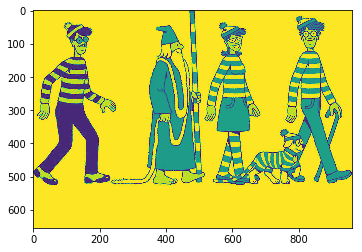

In [8]:
plt.imshow(waldo)
plt.show()

Set a filter for __convolution__:

In [9]:
filter = np.array([[1,1,1],[1,1,0],[1,0,0]])

Let's check if _ndimage_ return the same result as the function implemented above:

In [10]:
image1 = ndimage.filters.correlate(waldo, filter, mode='constant')
image1

array([[255, 253, 253, ..., 253, 253, 253],
       [253, 250, 250, ..., 250, 250, 251],
       [253, 250, 250, ..., 250, 250, 251],
       ...,
       [253, 250, 250, ..., 250, 250, 251],
       [253, 250, 250, ..., 250, 250, 251],
       [253, 251, 251, ..., 251, 251, 252]], dtype=uint8)

Since we want to return a valid image, we should limit our values 0-255:

In [11]:
image2 = np.mod(my_correlate_or_convolve(filter, waldo, mode='convolve'), 256)
image2

array([[255, 253, 253, ..., 253, 253, 253],
       [253, 250, 250, ..., 250, 250, 251],
       [253, 250, 250, ..., 250, 250, 251],
       ...,
       [253, 250, 250, ..., 250, 250, 251],
       [253, 250, 250, ..., 250, 250, 251],
       [253, 251, 251, ..., 251, 251, 252]])

The matrices are indeed the same.

In [12]:
np.array_equal(image1, image2)

True

Since by the question we are not reqired to get a valid matrix, let's demonstrate how convolution works.

In [13]:
my_correlate_or_convolve(filter, waldo, mode='convolve')

array([[ 255,  765,  765, ...,  765,  765,  765],
       [ 765, 1530, 1530, ..., 1530, 1530, 1275],
       [ 765, 1530, 1530, ..., 1530, 1530, 1275],
       ...,
       [ 765, 1530, 1530, ..., 1530, 1530, 1275],
       [ 765, 1530, 1530, ..., 1530, 1530, 1275],
       [ 765, 1275, 1275, ..., 1275, 1275, 1020]])

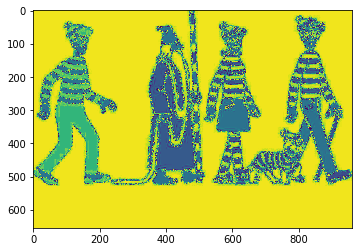

In [14]:
plt.imshow(image1)
plt.show()

__[1 point]__ Extend this code to handle RGB images and 3D filters (having
the third dimension equal to 3).

In [15]:
waldo = cv2.imread('waldo.png', 1)

In [16]:
waldo.shape

(655, 960, 3)

In [17]:
filter3d = np.array([[[1,2,3],[1,1,4], [1,4,6]], [[3,5,2], [1,3,5],[1,6,6]] , [[1,2,3], [5,1,3], [1,5,4]]])

__[1 point]__ Write your own function that creates an isotropic Gaussian lter
with $\sigma$ as an input parameter.

In [18]:
waldo = cv2.imread('waldo.png', 0)

In [19]:
def gaussian(x, y, sigma):
    sqdist = (x-1)**2 + (y-1)**2
    return (1 / (2*math.pi*sigma*sigma)) * math.exp(-sqdist/(2*sigma*sigma))

In [20]:
def get_gaussian_filter(size):
    kernel = []
    for i in range(0,size):
        for j in range(0,size):
            kernel.append(gaussian(i,j, 1.0))
    return  (np.array(kernel)/np.sum(kernel)).reshape(size, size)

Let's see how the image looks before applying Gaussian Filter.

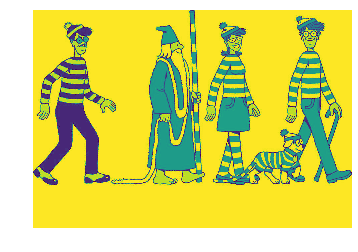

In [21]:
plt.imshow(waldo)
plt.axis('off')
plt.show()

In [22]:
my_filter = get_gaussian_filter(3)

Let's see the filter looks.

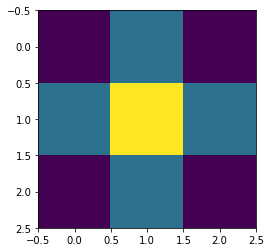

In [23]:
plt.imshow(my_filter)
plt.show()

It's indeed looks like a gaussian filter. Now let's see if its sum is equal to 1.

In [24]:
np.sum(my_filter)

1.0

Now, let's apply the filter to the image. 

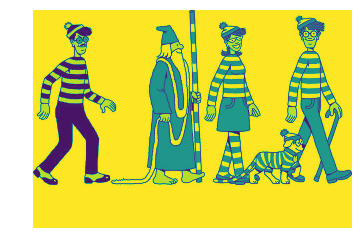

In [25]:
gau_waldo = ndimage.filters.convolve(waldo, my_filter)
plt.imshow(gau_waldo)
plt.axis('off')
plt.show()

The image indeed has much less noise. 

__[1 point]__ Compute magnitude of gradients for the attached images waldo.png
and template.png.

In [26]:
gradient_waldo = ndimage.gaussian_gradient_magnitude(waldo, 1)

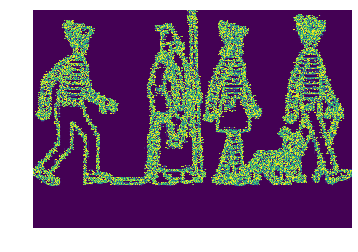

In [27]:
plt.imshow(gradient_waldo)
plt.axis('off')
plt.show()

In [28]:
dx = np.array([[-1, 0, 1 ], [-2, 0, 2], [-1, 0, 1]])

In [29]:
dy = dx.T

In [30]:
gau_waldo = ndimage.filters.gaussian_filter(waldo, sigma=1)

In [31]:
gradient_x = ndimage.filters.convolve(gau_waldo, dx)

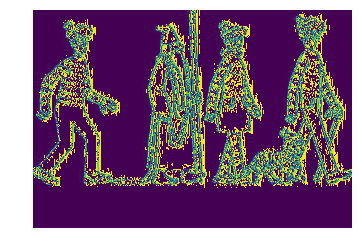

In [32]:
plt.imshow(gradient_x)
plt.axis('off')
plt.show()

In [33]:
gradient_y = ndimage.filters.convolve(gau_waldo, dy)

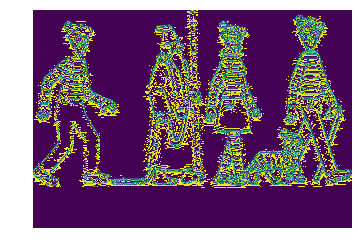

In [34]:
plt.imshow(gradient_y)
plt.axis('off')
plt.show()

In [35]:
magnitude = np.rint(np.sqrt(np.add(gradient_x**2, gradient_y**2)))
magnitude = magnitude.astype(np.uint8)

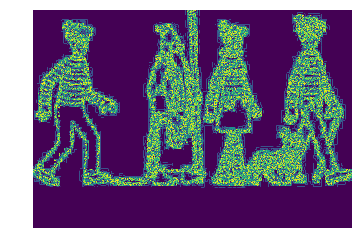

In [36]:
plt.imshow(magnitude)
plt.axis('off')
plt.show()